In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/bike/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Explore

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Explore datetime

In [4]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


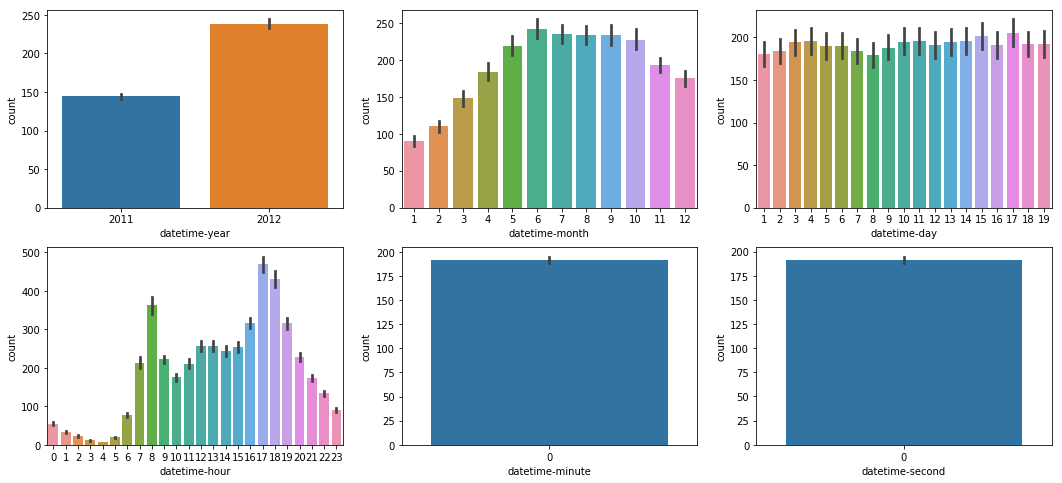

In [5]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned **
  * **datetime-minute**와 **datetime-second**는 현재 기록되고 있지 않다. 그러므로 사용할 필요가 없다.
  * train.csv와 test.csv는 **datetime-day**를 기준으로 나뉘어져 있다. 그러므로 **datetime-day**를 feature로 사용해서는 안 된다.

### Explore hour - workingday

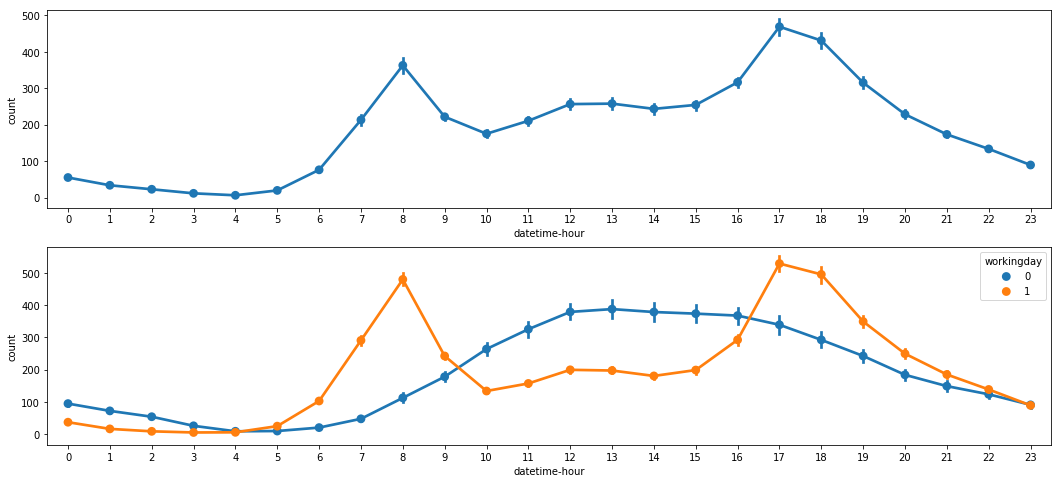

In [6]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

** Lesson Learned **
  * 주중(workingday==1)에는 출근 시간과 퇴근 시간에 자전거를 많이 대여한다.
  * 주말(workingday==0)에는 오후 시간에 자전거를 많이 대여한다.
  * 주중(월,화,수,목,금)이 주말(토,일)보다 많기 때문에, 두 개를 나눠서 보지 않으면 주말의 특성을 파악할 수 없다.

### Explore hour - dayofweek

In [7]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


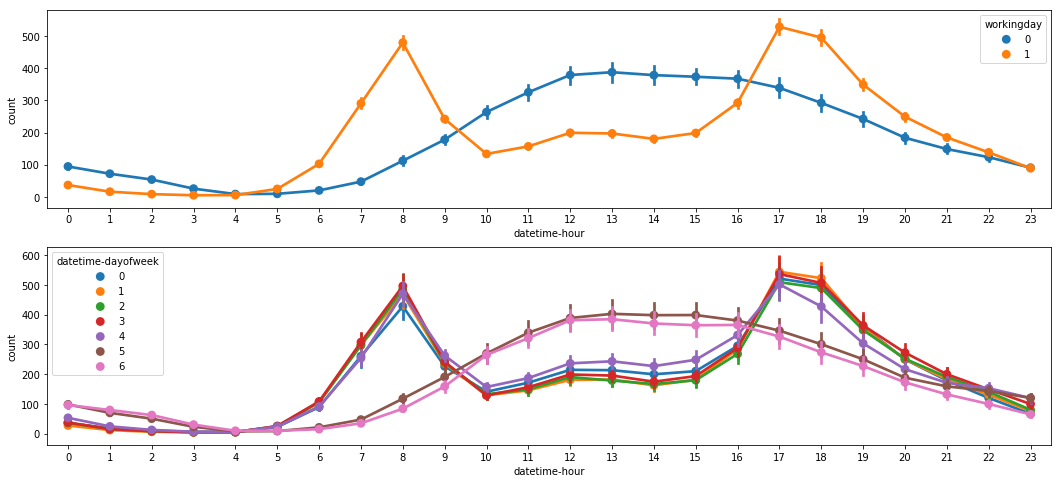

In [8]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

** Lesson Learned **
  * 금요일(workingday==4)는 주중이지만, 아주 약간 주말의 특성을 반영하고 있다.
  * 비슷하게 월요일(workingday==0)도 아주 약간 주말의 특성을 반영하고 있다.
  * 사람들이 휴가를 월요일과 금요일에 사용하기 때문이라고 추측할 수 있다.

### Concatenate year and month

In [9]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


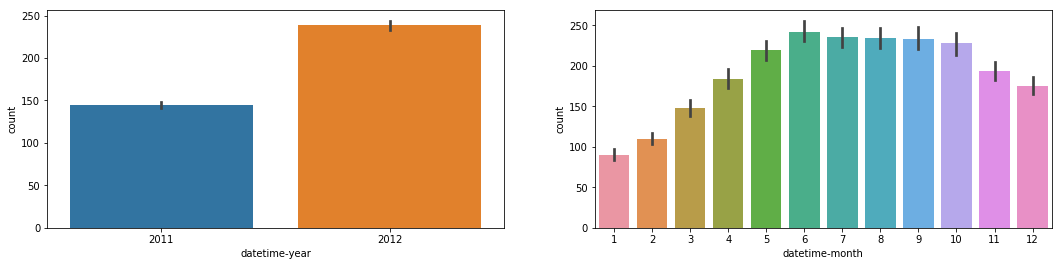

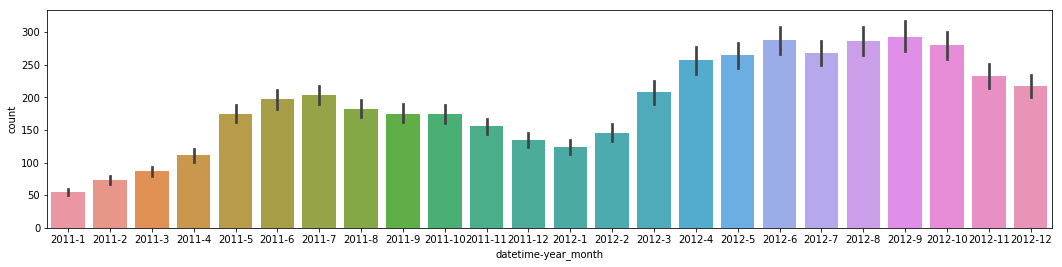

In [10]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)


figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 2011년 12월과 2012년 1월의 자전거 대여량을 비슷하지만, 두 개를 따로 놓고 보면 이를 알 수 없다.
  * 2011년에는 8월부터 대여량이 감소하고, 2012년에는 7월부터 대여량이 감소한다. 마찬가지로 따로 놓고 보면 이를 알 수 없다.

## Reload Dataset

In [11]:
train = pd.read_csv("data/bike/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
test = pd.read_csv("data/bike/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Preprocessing

### Parse datetime

In [13]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [14]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [15]:
# 시간 인코딩
hour = train["datetime-hour"]
hour = test["datetime-hour"]

# 근무일 출근시간
train["morning_rush_hour"] = ((train["datetime"].dt.hour >= 7) | (train["datetime"].dt.hour < 11) == 1) & ( train["workingday"] == 1 )
test["morning_rush_hour"] = (test["datetime"].dt.hour >= 7) | (test["datetime"].dt.hour < 11) == 1 & ( test["workingday"] == 1 )

# 근무일 퇴근시간
train["evening_rush_hour"] = (train["datetime"].dt.hour >= 16) | (train["datetime"].dt.hour < 20) == 1 & ( train["workingday"] == 1 )
test["evening_rush_hour"] = (test["datetime"].dt.hour >= 16) | (test["datetime"].dt.hour < 20) == 1 & ( test["workingday"] == 1 )

# 휴일
train["not_workingday_daytime"] = ((train["datetime"].dt.hour >= 10) | (train["datetime"].dt.hour < 17) == 1) & ( train["workingday"] == 0 )
test["not_workingday_daytime"] = (test["datetime"].dt.hour >= 10) | (test["datetime"].dt.hour < 17) == 1 & ( test["workingday"] == 0 )


train["windspeed_High"] = train["windspeed"] >= 40
test["windspeed_High"] = test["windspeed"] >= 40

# 온도
train["temp_Bad"] = (train["temp"] < -10) | (train["temp"] >= 40)
train["temp_Good"] = (train["temp"] >= -10) & (train["temp"] < 40 )

test["temp_Bad"] = (test["temp"] < -10) | (test["temp"] >= 40)
test["temp_Good"] = (test["temp"] >= -10) & (test["temp"] < 40 )

# 습도는 30이하이거나 80이상이면 Bad로 그 안의 범위이면 Good으로 두 가지로 나눔
train["humidity_Bad"] = (train["humidity"] < 10) 
train["humidity_Good"] = (train["humidity"] >= 30) & (train["humidity"] <= 80 )

test["humidity_Bad"] = (test["humidity"] < 10) 
test["humidity_Good"] = (test["humidity"] >= 30) & (test["humidity"] <= 80 )


# 요일, 계절, 기후 one hot encoding
for i in range(0, 7):
    weekday_col_name = "weekday" + str(i)
    train[weekday_col_name] = train["datetime"].dt.weekday == i
    test[weekday_col_name] = train["datetime"].dt.weekday == i
    if ( i < 5 ) | ( i > 0) :
        season_col_name = "season" + str(i)
        weather_col_name = "weather" + str(i)
        train[season_col_name] = train["season"] == i
        train[weather_col_name] = train["weather"] == i
        test[season_col_name] = test["season"] == i
        test[weather_col_name] = test["weather"] == i

## Train

In [16]:
feature_names = ["season", "weather", 
                 "holiday", "workingday",
                 "temp", "atemp", "humidity",
                 "datetime-year", "datetime-hour", "datetime-dayofweek",
                 "morning_rush_hour", "evening_rush_hour", "not_workingday_daytime", "windspeed_High", 
                 "temp_Bad","humidity_Bad"
                ]

feature_names

['season',
 'weather',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek',
 'morning_rush_hour',
 'evening_rush_hour',
 'not_workingday_daytime',
 'windspeed_High',
 'temp_Bad',
 'humidity_Bad']

In [17]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 16)


,season,weather,holiday,workingday,temp,atemp,humidity,datetime-year,datetime-hour,datetime-dayofweek,morning_rush_hour,evening_rush_hour,not_workingday_daytime,windspeed_High,temp_Bad,humidity_Bad
0,1,1,0,0,9.84,14.395,81,2011,0,5,False,False,True,False,False,False
1,1,1,0,0,9.02,13.635,80,2011,1,5,False,False,True,False,False,False
2,1,1,0,0,9.02,13.635,80,2011,2,5,False,False,True,False,False,False
3,1,1,0,0,9.84,14.395,75,2011,3,5,False,False,True,False,False,False
4,1,1,0,0,9.84,14.395,75,2011,4,5,False,False,True,False,False,False


In [18]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 16)


,season,weather,holiday,workingday,temp,atemp,humidity,datetime-year,datetime-hour,datetime-dayofweek,morning_rush_hour,evening_rush_hour,not_workingday_daytime,windspeed_High,temp_Bad,humidity_Bad
0,1,1,0,1,10.66,11.365,56,2011,0,3,True,True,False,False,False,False
1,1,1,0,1,10.66,13.635,56,2011,1,3,True,True,False,False,False,False
2,1,1,0,1,10.66,13.635,56,2011,2,3,True,True,False,False,False,False
3,1,1,0,1,10.66,12.880,56,2011,3,3,True,True,False,False,False,False
4,1,1,0,1,10.66,12.880,56,2011,4,3,True,True,False,False,False,False


In [19]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []


In [21]:
from sklearn.ensemble import RandomForestRegressor

# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# 하이퍼파라메터
# 어떻게 사용하면 베스트 파라메터를 찾을까? 존재하는 모든 데이터를 다 넣어본다.
# 강사의 주관적인 팁 n_estimators은 높을 수록 좋다. 처음에는 100~300정도 고정시켜주고 나머지 하이퍼 파라메터를 조정한다.
# n_estimators=10
# max_depth=None
# max_features='auto' 0.1 ~ 1.0

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Score

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [22]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [23]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, \
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Score = 0.36600


* 강사님이 주신 코드의 Score = 0.36973
* windspeed_hig를 추가했을 때 Score = 0.36999
* 계절과 웨더를 인코딩 하면 Score = 0.37066
* midnight를 인코딩 하면 Score = 0.37025
* 근무일 출퇴근 시간과 Score = 0.36935
* 윈드스피드 없는 값에 평균을 넣어주면 Score = 0.36969
* 근무일 아닌 날 많이 이용하는 시간대 Score = 0.36931
* atemp 제거 시 Score = 0.37011
* 윈드스피드 하이 Score = 0.36588
* 온도 좋고 나쁨, 휴미니티배드, Score = 0.36565

## Train

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [25]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions

(6493,)


array([  11.4 ,    4.58,    3.7 , ...,  104.87,  101.62,   46.55])

In [26]:
# 자연상수 로그를 씌우면
# 스코어링 매트릭이 특이하면 이렇게도 개선시킬 수 있다.
value= np.log(4+1)

## Submit

In [27]:
submission = pd.read_csv("data/bike/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.40
1,2011-01-20 01:00:00,4.58
2,2011-01-20 02:00:00,3.70
3,2011-01-20 03:00:00,4.08
4,2011-01-20 04:00:00,3.10


In [28]:
submission.to_csv("data/bike/beating-the-top-10.csv", index=False)

In [29]:
# 모든 분야에 공통적으로 사용되는 방법
# 하이퍼 파라메터의 베스트 하이퍼파라메터를 찾는다.
